# P01_2 - Data Cleansing and evaluation

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt
import re

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest


In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot


In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [11]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
%config InlineBackend.figure_format = 'retina'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [15]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [16]:
df.shape

(40000, 101)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [18]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


separating the numeric features (including target value)

In [19]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [20]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Dealing with NaNs in numerical columns NaN

In [21]:
columns_numeric_dtype = df_numeric.columns
print('columns_numeric_dtype = ', columns_numeric_dtype)

columns_numeric_dtype =  Index(['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')


In [22]:
df[columns_numeric_dtype].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x4      40000 non-null  float64
 4   x5      37572 non-null  float64
 5   x6      40000 non-null  float64
 6   x8      40000 non-null  float64
 7   x9      40000 non-null  float64
 8   x10     40000 non-null  float64
 9   x11     34890 non-null  float64
 10  x12     40000 non-null  float64
 11  x13     40000 non-null  float64
 12  x14     30136 non-null  float64
 13  x15     40000 non-null  float64
 14  x16     28788 non-null  float64
 15  x17     40000 non-null  float64
 16  x18     40000 non-null  float64
 17  x20     40000 non-null  float64
 18  x21     40000 non-null  float64
 19  x22     37613 non-null  float64
 20  x23     40000 non-null  float64
 21  x25     40000 non-null  float64
 22

Check out the numerics columns, number of uniques and number of NaNs

In [23]:
# (df_numeric.isna().sum()>0)

In [24]:
df_numeric_features = df_numeric.drop(['y'], axis=1)
df_numeric_features.shape

(40000, 88)

In [25]:
df_numeric_features_with_nan_cols = [i for i in df_numeric_features.columns if df_numeric_features[i].isnull().any()]
df_numeric_features_with_nan = df_numeric[df_numeric_features_with_nan_cols]
print(df_numeric_features_with_nan.shape)

(40000, 38)


In [26]:
df_numeric_features_no_nan = df_numeric_features
df_numeric_features_no_nan = df_numeric_features_no_nan.dropna(axis='columns', how='any')

In [27]:
df_numeric_features_no_nan.shape

(40000, 50)

In [28]:
print(df_numeric_features_with_nan.columns)

Index(['x5', 'x11', 'x14', 'x16', 'x22', 'x26', 'x30', 'x38', 'x41', 'x42',
       'x44', 'x45', 'x49', 'x52', 'x54', 'x55', 'x57', 'x61', 'x63', 'x64',
       'x67', 'x68', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x83', 'x85',
       'x86', 'x88', 'x89', 'x91', 'x92', 'x94', 'x95', 'x96'],
      dtype='object')


In [29]:
print(df_numeric_features_no_nan.columns)

Index(['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10', 'x12', 'x13', 'x15', 'x17',
       'x18', 'x20', 'x21', 'x23', 'x25', 'x27', 'x28', 'x29', 'x32', 'x34',
       'x35', 'x36', 'x37', 'x40', 'x43', 'x46', 'x47', 'x48', 'x50', 'x51',
       'x53', 'x56', 'x58', 'x59', 'x62', 'x66', 'x69', 'x70', 'x71', 'x72',
       'x73', 'x81', 'x82', 'x84', 'x87', 'x90', 'x97', 'x98', 'x100'],
      dtype='object')


In [30]:
# check the object columns uniqueness
number_of_numeric_cols_with_nan = 0
cols_to_be_imputed = []
columns_numeric_dtype_NaN = []
cols_to_be_droped = []
for col in columns_numeric_dtype:
    if df[col].isnull().sum() != 0:
        
        number_of_numeric_cols_with_nan = number_of_numeric_cols_with_nan+1
        columns_numeric_dtype_NaN.append(col)
        print('NaNs % in column ', col, '=', 
              df[col].isnull().sum()*100/(df.shape[0]), '%')#, 'var = ', df[col].var())

        # also if there is NaN add the column to cols_to_be_imputed
        cols_to_be_imputed.append(col)
        
        # also if the NaN% is greater than 50% drop it (add the column to drop col list)
        if df[col].isnull().sum()*100/(df.shape[0]) > 50:
            cols_to_be_droped.append(col)

print('\nnumber_of_numeric_cols_with_nan ', number_of_numeric_cols_with_nan)

NaNs % in column  x5 = 6.07 %
NaNs % in column  x11 = 12.775 %
NaNs % in column  x14 = 24.66 %
NaNs % in column  x16 = 28.03 %
NaNs % in column  x22 = 5.9675 %
NaNs % in column  x26 = 6.0825 %
NaNs % in column  x30 = 80.84 %
NaNs % in column  x38 = 6.005 %
NaNs % in column  x41 = 23.7575 %
NaNs % in column  x42 = 24.3225 %
NaNs % in column  x44 = 85.6175 %
NaNs % in column  x45 = 20.0225 %
NaNs % in column  x49 = 32.0575 %
NaNs % in column  x52 = 40.455 %
NaNs % in column  x54 = 31.82 %
NaNs % in column  x55 = 44.24 %
NaNs % in column  x57 = 81.16 %
NaNs % in column  x61 = 18.2325 %
NaNs % in column  x63 = 6.05 %
NaNs % in column  x64 = 12.7525 %
NaNs % in column  x67 = 6.0625 %
NaNs % in column  x68 = 5.96 %
NaNs % in column  x74 = 32.29 %
NaNs % in column  x75 = 13.1125 %
NaNs % in column  x76 = 13.1225 %
NaNs % in column  x78 = 28.4325 %
NaNs % in column  x79 = 6.075 %
NaNs % in column  x80 = 13.14 %
NaNs % in column  x83 = 6.07 %
NaNs % in column  x85 = 24.2875 %
NaNs % in column  

In [31]:
# column to be droped are
print('cols_to_be_droped = ', cols_to_be_droped)

cols_to_be_droped =  ['x30', 'x44', 'x57']


# Column 'x30', 'x44', 'x57' have more than 50% nan and should be droped

Let's calculate the average number of NaNs in numeric columns containing NaN 

In [32]:
average_percentage_NaN = (df[columns_numeric_dtype_NaN].isnull().sum().sum()*100/\
                          (df.shape[0]))/len(columns_numeric_dtype_NaN)
average_percentage_NaN = round(average_percentage_NaN,1)
print(f'average_percentage_NaN {average_percentage_NaN} %')

average_percentage_NaN 22.4 %


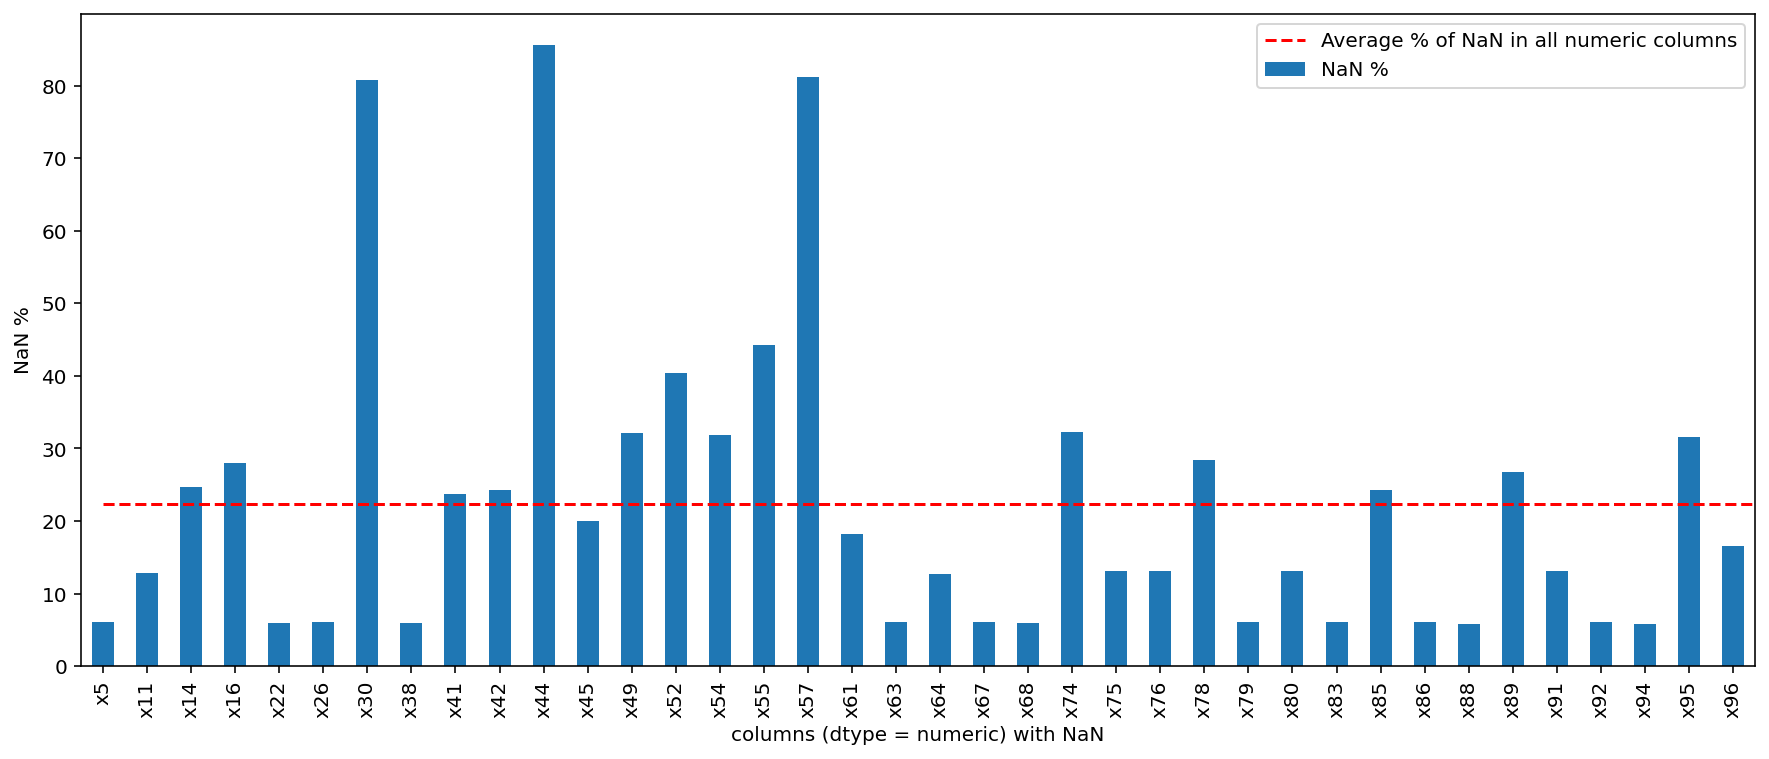

In [33]:
(df[columns_numeric_dtype_NaN].isnull().sum()*100/(df.shape[0])).plot(kind='bar',figsize=(15,6), label='NaN %')


plt.hlines(average_percentage_NaN,0,38, 
           linestyles='--',colors='r', label='Average % of NaN in all numeric columns')

plt.xlabel('columns (dtype = numeric) with NaN')
plt.ylabel('NaN %')
plt.legend()
plt.savefig("../Figures/plot_01_2_ave_NaN.png")
plt.show()

# Skewness

Checking out the numeric features skewness

In [34]:
df_numerics = df.select_dtypes(include=['float64','int64'])
df_numerics.skew()

y       2.015685
x1      0.382880
x2      0.010218
x4      0.007023
x5     -0.005447
          ...   
x95     0.049023
x96     0.632746
x97     0.019503
x98     0.009400
x100   -0.010159
Length: 89, dtype: float64

dropping out the target column and checking out the average skewness in numeric features

In [35]:
numeric_feature_cols = list(df_numerics.columns)
# numeric_cols

In [36]:
numeric_feature_cols.remove('y')

In [37]:
df_numerics[numeric_feature_cols].skew().mean()

0.42356124372061094

In [38]:
df_numerics[numeric_feature_cols].skew().std()

1.0416404366337622

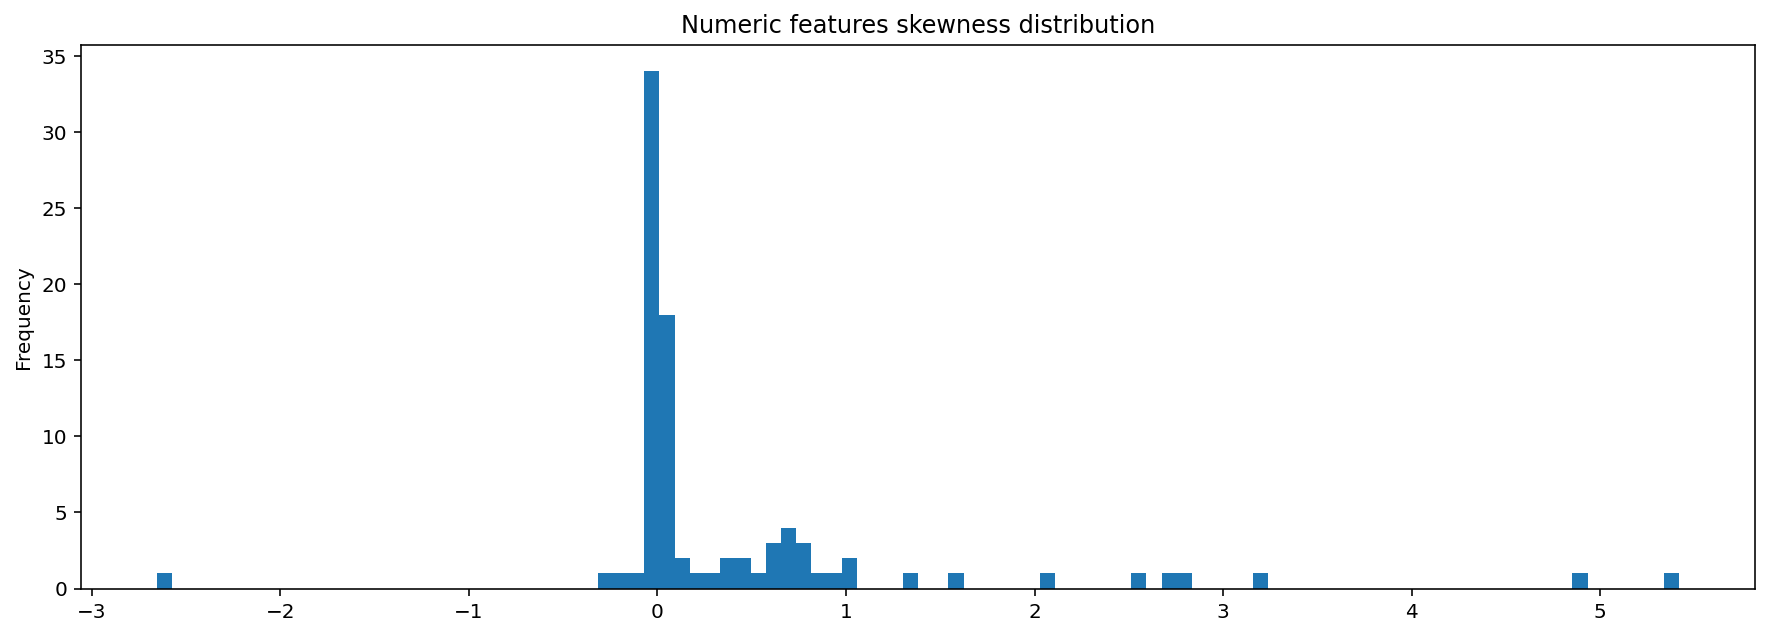

In [39]:
df_numerics[numeric_feature_cols].skew().plot(kind='hist',
                                              bins=100,
                                              figsize=(15,5))
plt.title('Numeric features skewness distribution')
plt.savefig("../Figures/plot_01_2_skewness_hist.png")
plt.show()

0.38288013485562417


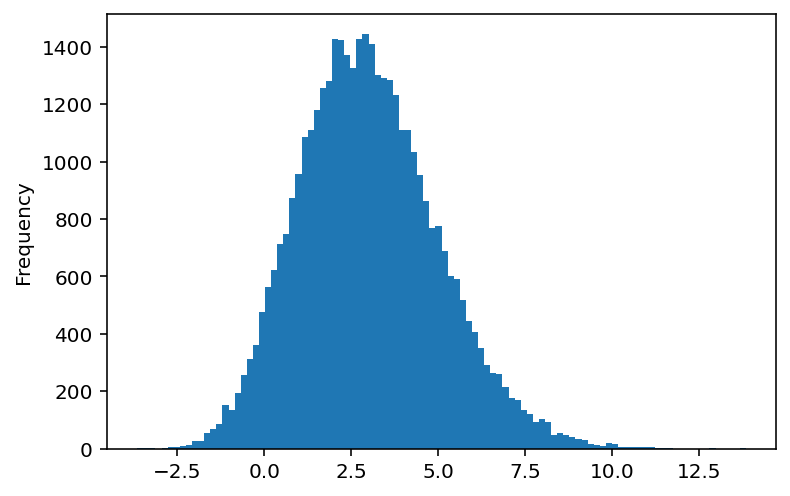

In [40]:
df_numerics['x1'].plot(kind='hist', bins=100)
print(df_numerics['x1'].skew())

filtering out the columns with skewness greater than 1 and less than -1

In [41]:
cols_with_high_skewness = []
cols_with_high_skewness_WithNoTrg = []
for i, col in enumerate(df_numerics.columns):
    if df_numerics.skew()[i]>1 or df_numerics.skew()[i]<-1:
        cols_with_high_skewness.append(col)
        cols_with_high_skewness_WithNoTrg.append(col)
cols_with_high_skewness_WithNoTrg.remove('y')
print(cols_with_high_skewness_WithNoTrg)

['x13', 'x21', 'x32', 'x35', 'x44', 'x59', 'x67', 'x73', 'x75', 'x79', 'x84', 'x89']


In [42]:
# df_numerics
# df_numerics[cols_with_high_skewness_WithNoTrg].skew().mean()

In [43]:
# cols_with_high_skewness.remove('y')

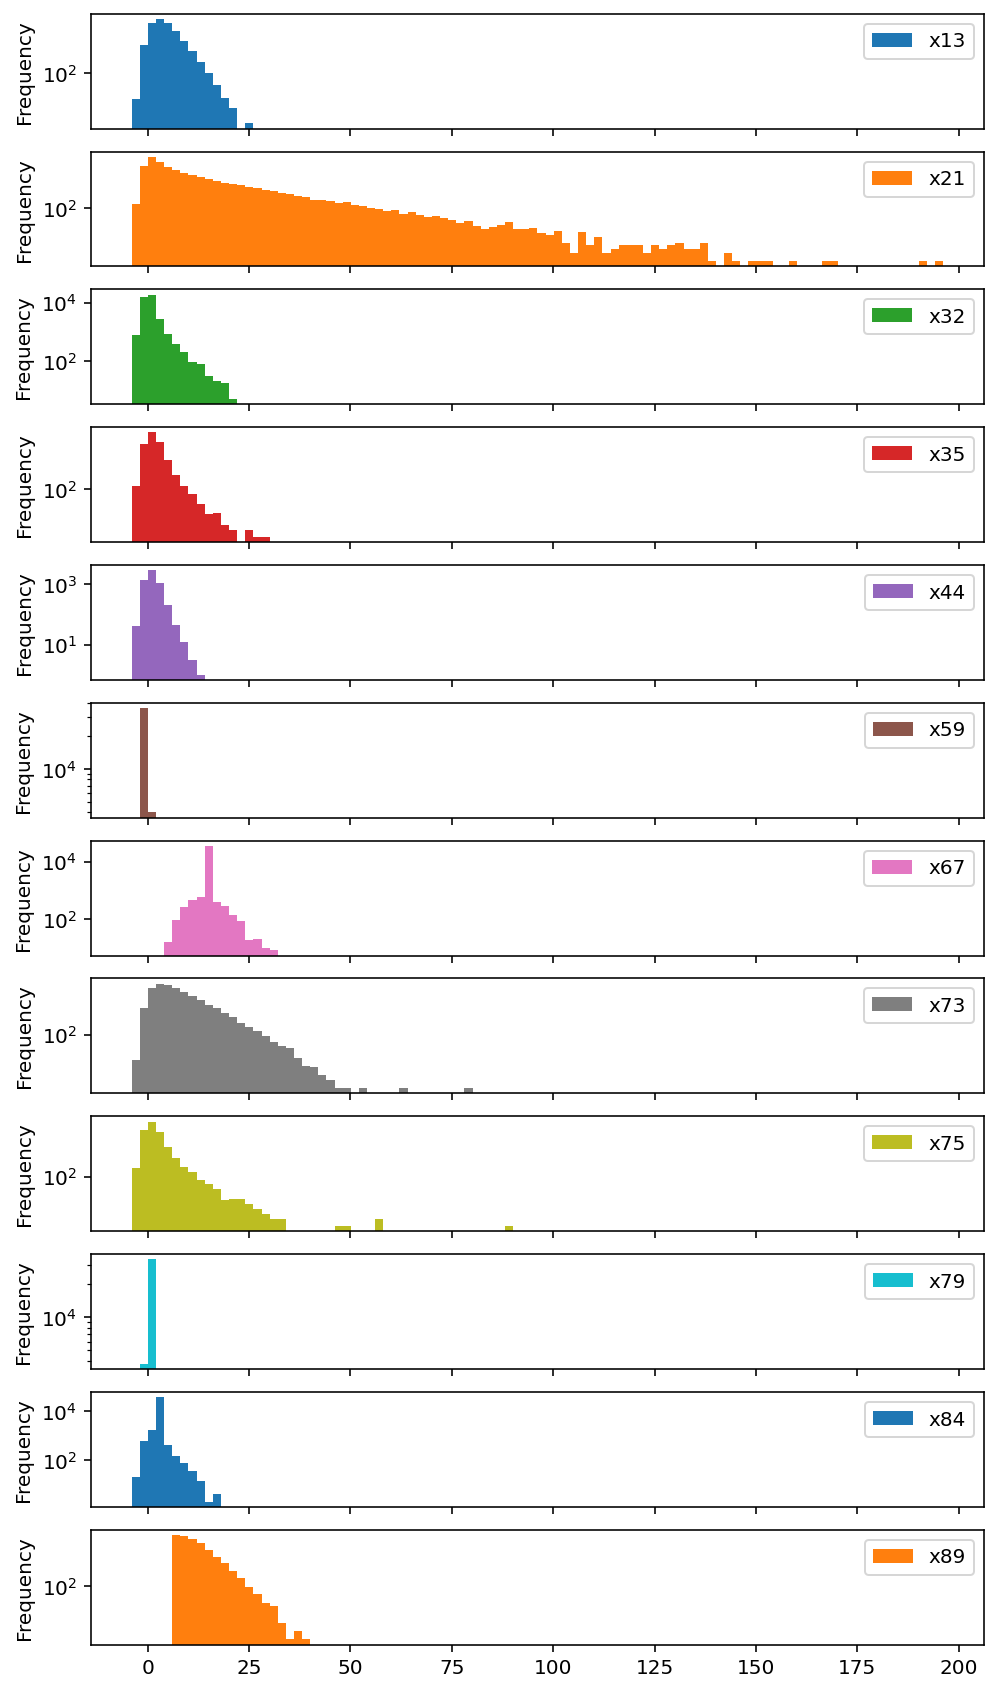

In [44]:
df_numerics[cols_with_high_skewness_WithNoTrg].plot(kind="hist",
                                                    bins=100, 
                                                    log=True, subplots=True,
                                                    figsize=(8,15),
                                                    )
plt.savefig("../Figures/plot_01_2_skewness_hist_all_highakew.png")

plt.show()

In [45]:
for col in df_numerics.columns:
    if len(df_numerics[col].unique()) < 1000:
        
        print('col = ', col, 'len is ', len(df_numerics[col].unique()))

col =  y len is  2
col =  x59 len is  2
col =  x79 len is  3
col =  x98 len is  2


# Three features inside the numeric df need to be transformed using One Hot Encoding. These are features with 0-1 values and should be treated like category features.
These are 0-1 features and should be treated like category features. I will keep the rest and will use some sort of tranformation later in pipeline to overcome skewness.

columns are x59 and x79 and x98

2.6732635637856945


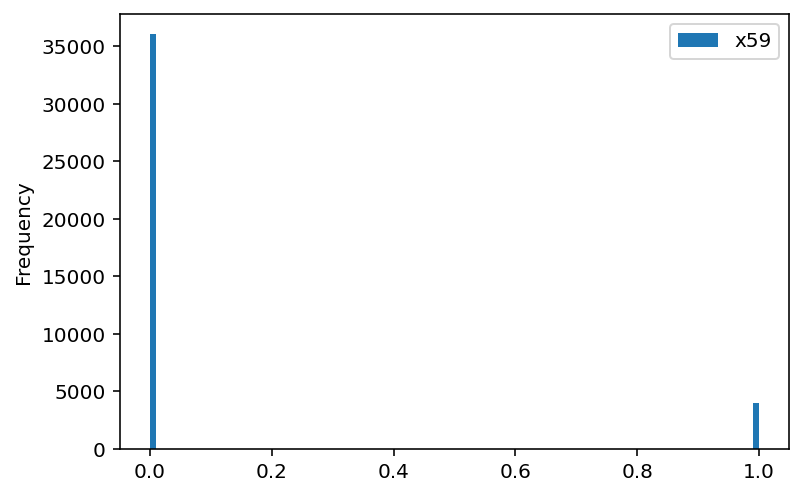

In [46]:
df_numerics['x59'].plot(kind='hist', bins=100,legend=True)
print(df_numerics['x59'].skew())

In [47]:
df['x59'].value_counts()

0    36014
1     3986
Name: x59, dtype: int64

-2.6530393476566356


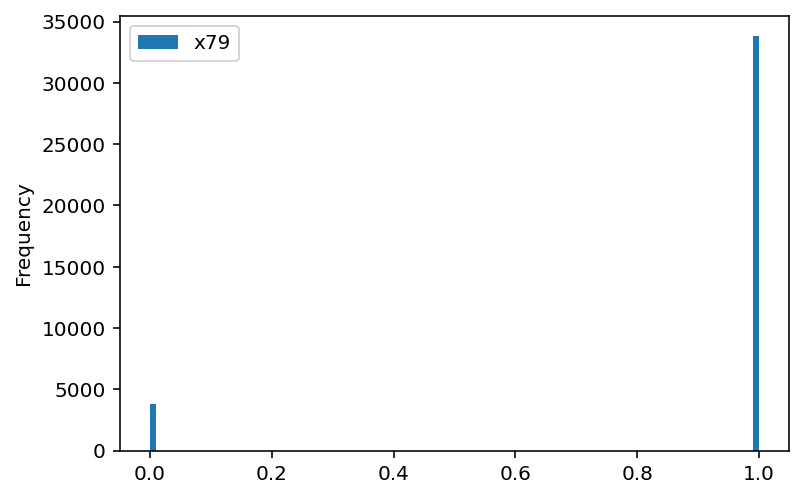

In [48]:
df_numerics['x79'].plot(kind='hist', bins=100,legend=True)
print(df_numerics['x79'].skew())

In [49]:
df['x79'].value_counts()

1.0    33785
0.0     3785
Name: x79, dtype: int64

In [50]:
# df_numerics.columns

In [51]:
# for col in df_numerics.columns:
#     if len(df_numerics[col].unique()) < 1000:
        
#         print('col = ', col, 'len is ', len(df_numerics[col].unique()))

In [52]:
# len(df_numerics['x79'].unique())

0.009400456345505535


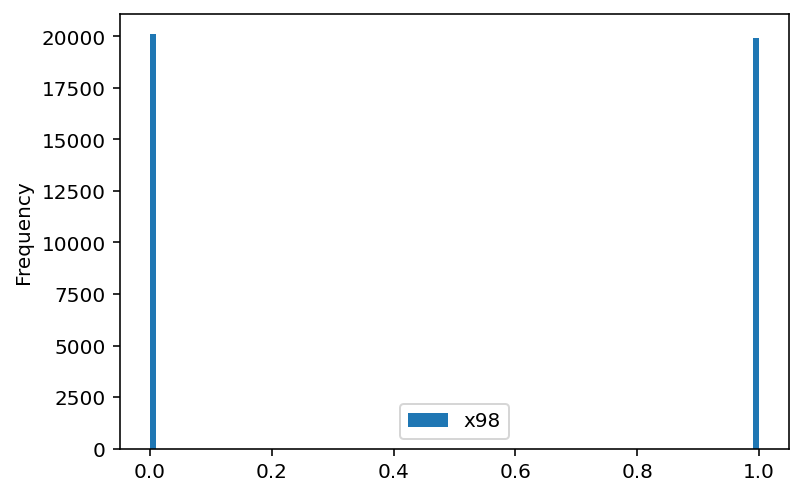

In [53]:
df_numerics['x98'].plot(kind='hist', bins=100,legend=True)
print(df_numerics['x98'].skew())

In [54]:
# df_numerics_corr = df_numerics[cols_with_high_skewness].corr()
# plt.figure(figsize=(6,6))
# sns.heatmap(df_numerics_corr[['y']].sort_values(by=['y'],ascending=False),
#             vmin=-1,
#             cmap='coolwarm',
#             annot=True);

# Outliers

Checking out the outliers 

In [55]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [56]:
# df_numerics = df[df.dtypes == 'float64']
df_numerics = df.select_dtypes(include=['float64','int64'])

In [57]:
df_numerics.columns

Index(['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')

In [58]:
df['x7']

0         0.0062%
1         0.0064%
2         -8e-04%
3        -0.0057%
4         0.0109%
           ...   
39995    -0.0085%
39996     0.0077%
39997    -0.0216%
39998      1e-04%
39999     0.0034%
Name: x7, Length: 40000, dtype: object

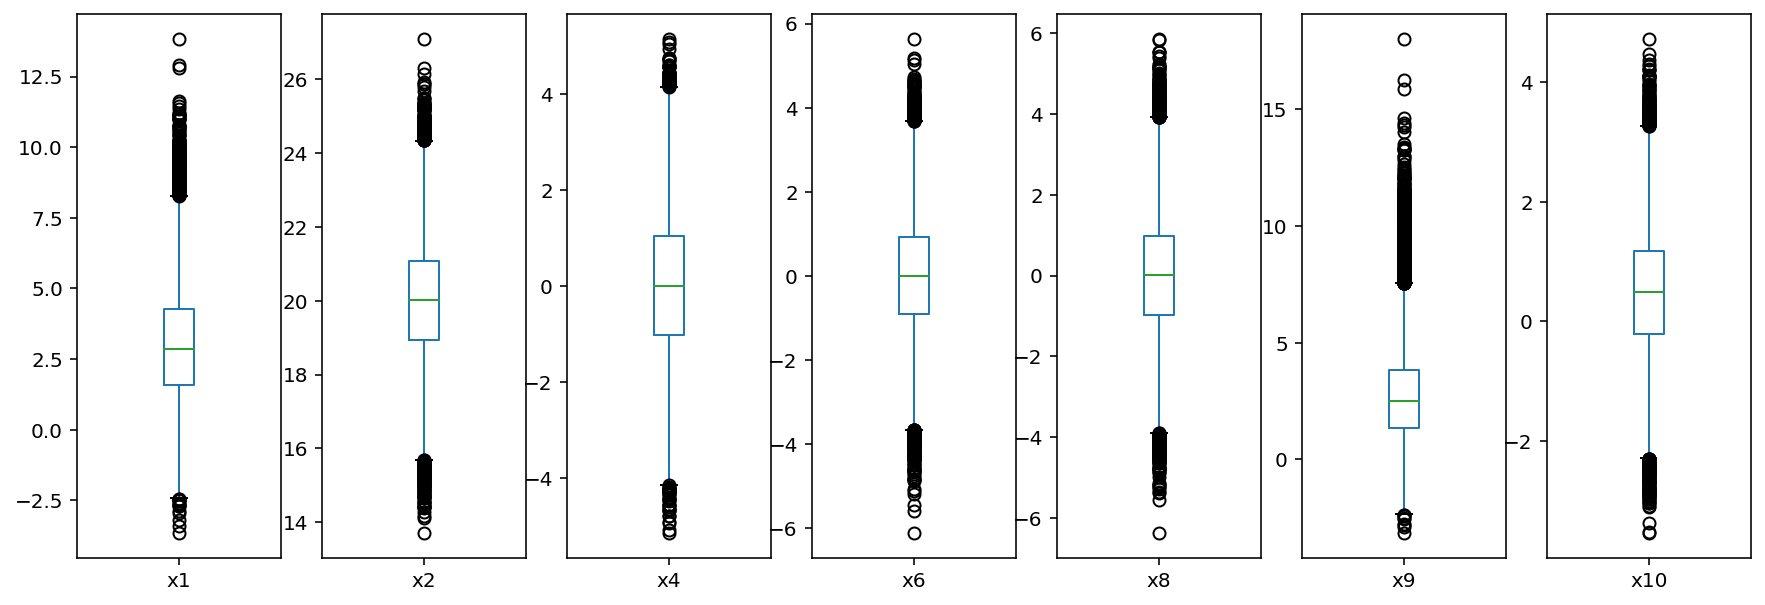

In [59]:
df_numerics[['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10']].plot(kind="box",
                                                              subplots=True,figsize=(15,5))
plt.savefig("../Figures/plot_01_2_boxplot.png")

plt.show()

In [60]:
df_numerics_sub = df_numerics[['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10']]
print('before applying LOF', df_numerics_sub.shape)

before applying LOF (40000, 7)


In [61]:
# identify outliers in the df_numerics dataset
lof = LocalOutlierFactor(n_neighbors=500)
yhat = lof.fit_predict(df_numerics_sub)

In [62]:
# select all rows that are not outliers
mask = yhat != -1
df_numerics_no_outlier = df_numerics_sub[mask]
print('after applying LOF', df_numerics_no_outlier.shape)
# summarize the shape of the updated training dataset
# df_numerics_no_outlier.head()

after applying LOF (39784, 7)


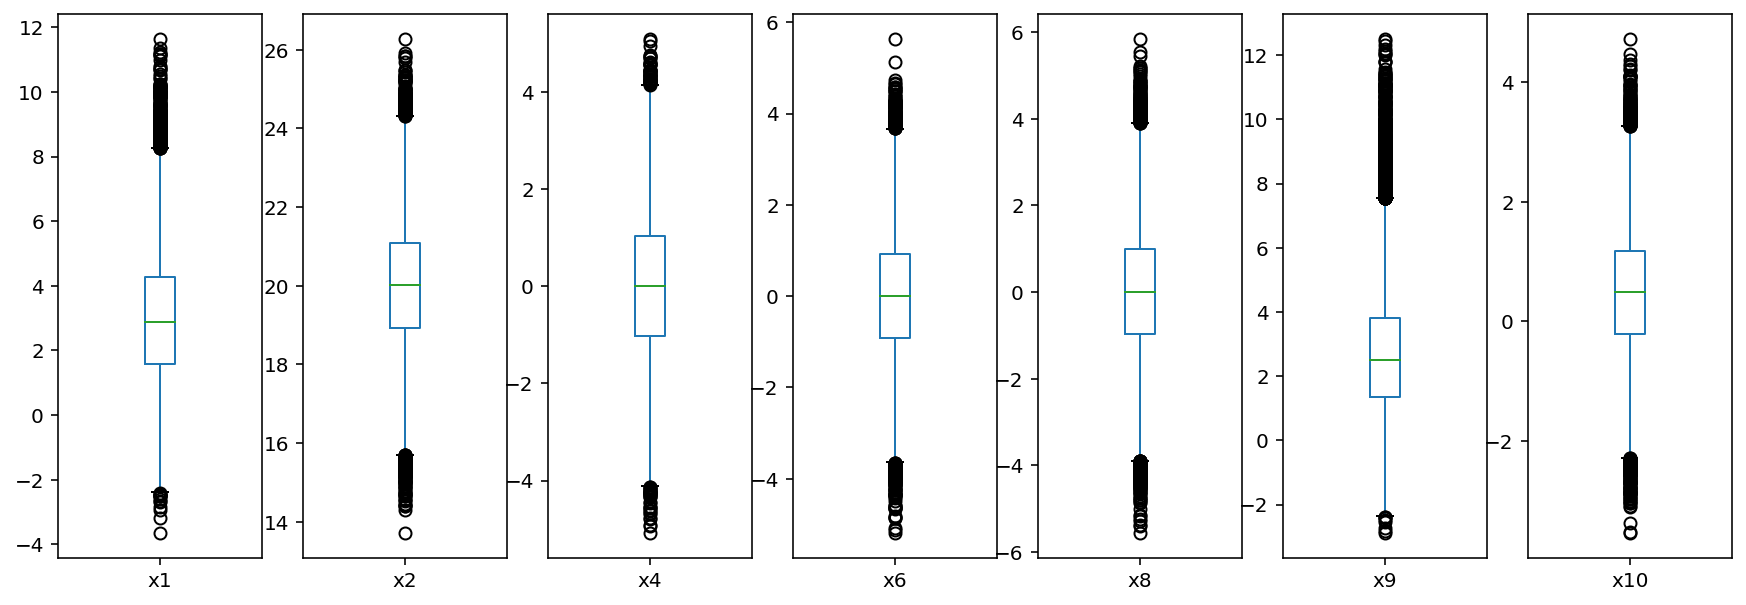

In [63]:
df_numerics_no_outlier[['x1', 'x2', 'x4', 'x6', 
                        'x8', 'x9', 'x10']].plot(kind="box",
                                                       subplots=True,figsize=(15,5))
plt.savefig("../Figures/plot_01_2_lof_nooutlier_boxplot.png")

plt.show()

Outlier detection using Isolation Forest

before applying LOF (40000, 7)
after applying LOF (20000, 7)


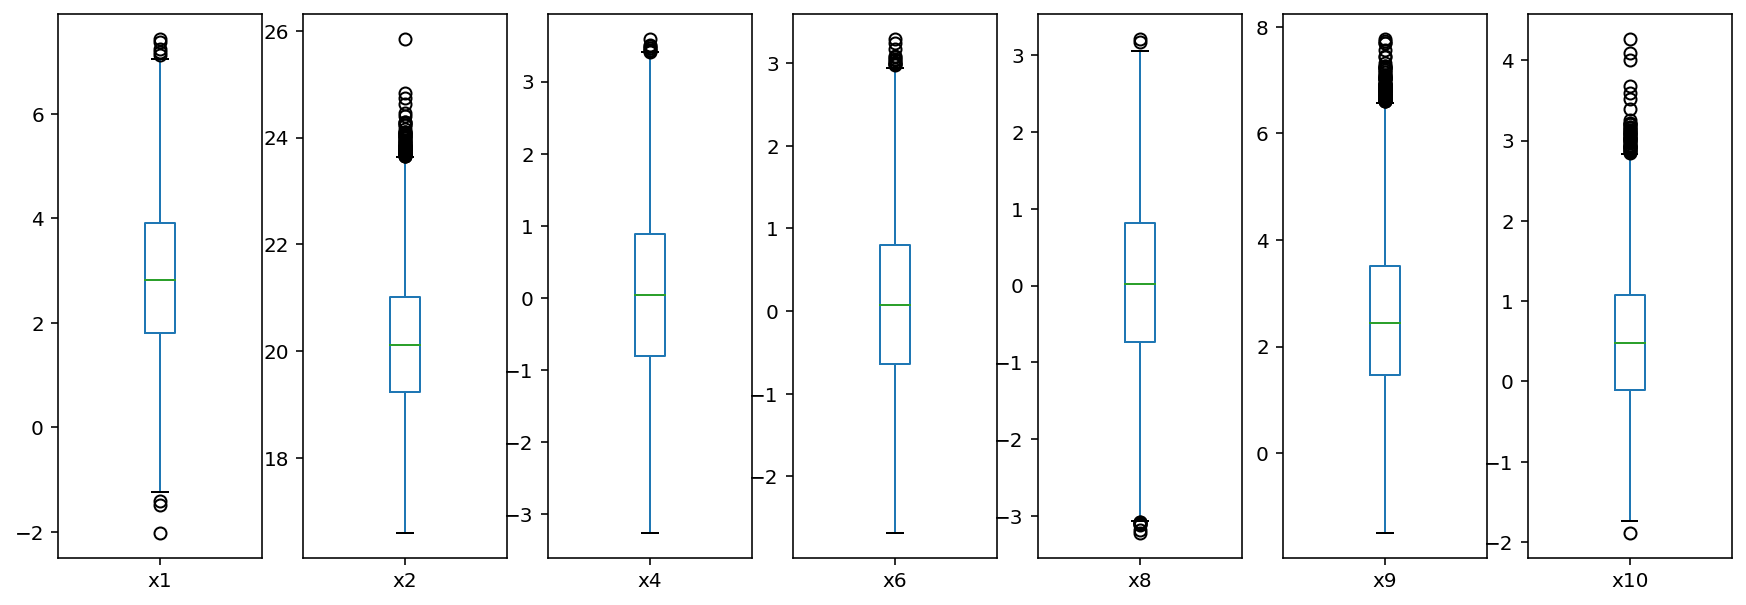

In [64]:

# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
iso = IsolationForest(contamination=0.5)
yhat_IsolationForest = iso.fit_predict(df_numerics_sub)

# select all rows that are not outliers
mask = yhat_IsolationForest != -1
df_numerics_no_outlier = df_numerics_sub[mask]
print('before applying LOF', df_numerics_sub.shape)
print('after applying LOF', df_numerics_no_outlier.shape)

df_numerics_no_outlier[['x1', 'x2', 'x4', 'x6', 
                        'x8', 'x9', 'x10']].plot(kind="box",
                                                       subplots=True,figsize=(15,5))
plt.savefig("../Figures/plot_01_2_IsolationForest_aplied_boxplot.png")

plt.show()

Outlier detection using EllipticEnvelope

before applying LOF (40000, 7)
after applying LOF (39600, 7)


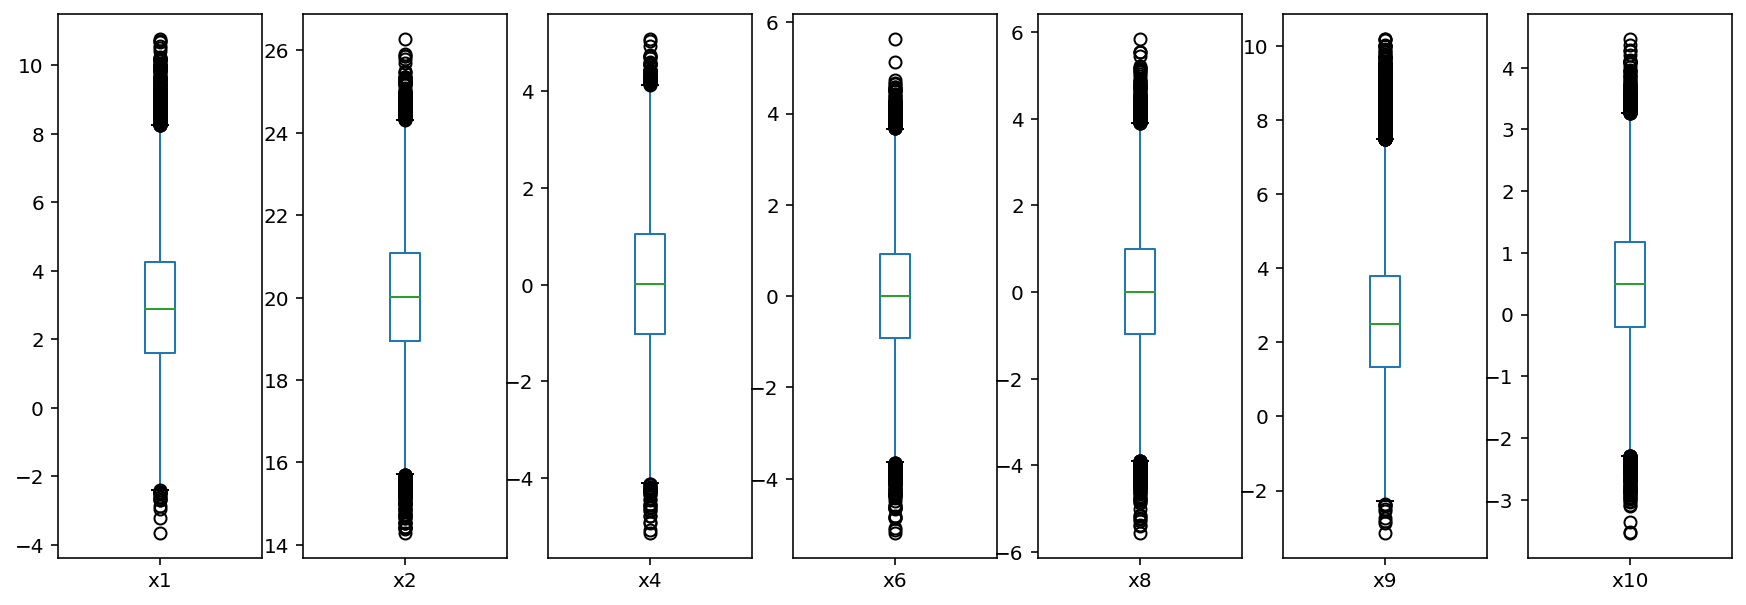

In [65]:
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat_EllipticEnvelope = ee.fit_predict(df_numerics_sub)

# select all rows that are not outliers
mask = yhat_EllipticEnvelope != -1
df_numerics_no_outlier = df_numerics_sub[mask]
print('before applying LOF', df_numerics_sub.shape)
print('after applying LOF', df_numerics_no_outlier.shape)

df_numerics_no_outlier[['x1', 'x2', 'x4', 'x6', 
                        'x8', 'x9', 'x10']].plot(kind="box",
                                                       subplots=True,figsize=(15,5))
plt.savefig("../Figures/plot_01_2_EllipticEnvelope_aplied_boxplot.png")

plt.show()

# I may use Isolation Forest or LOF for outlier detection. I will check the AUC to see the differences.

Note that the LOF should be applied after imputing the features.

In [66]:
df_numerics_sub.columns

Index(['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10'], dtype='object')

In [67]:
from sklearn.preprocessing import FunctionTransformer

# Numerical feature selection

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

In [68]:
df_numerics.columns

Index(['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')

In [69]:
y = df['y']
y.shape

(40000,)

In [70]:

X = df_numeric_features
print(X.shape)
y = df['y']
print(y.shape)

(40000, 88)
(40000,)


My steps are as follow:

- impute NaNs
- select features using SelectKBest
- model with auc as metric and customized weights
- cross validation 10 fold



In [71]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

# define dataset
# X, y = load_dataset('pima-indians-diabetes.csv')
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
    
    weights = weights = {0:0.85, 1:0.14}
    
    # create pipeline
    imp = SimpleImputer(strategy='mean')
    
    model = LogisticRegression(solver='liblinear', class_weight=weights)
    
    fs = SelectKBest(score_func=f_classif, k=k)

    pipeline = Pipeline(steps=[('simpleImput', imp), ('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline)
    results.append(scores)
    
    # summarize the results
    print('mean = ',scores.mean(), '| std =', scores.std())
#     print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

mean =  0.5992765865843772 | std = 0.013211702539625668
mean =  0.623739672335051 | std = 0.01279061559274737
mean =  0.6252615642867219 | std = 0.012914341593290251
mean =  0.62902220735632 | std = 0.01312885994330826
mean =  0.6290726915751493 | std = 0.01294367842601962
mean =  0.6304802325577955 | std = 0.01320657575193734
mean =  0.6322796924166041 | std = 0.01314066549503515
mean =  0.6341913901153213 | std = 0.0128819451973898
mean =  0.634425231577292 | std = 0.012634753109666991
mean =  0.6364711608581953 | std = 0.01306101731381874
mean =  0.6387753725484459 | std = 0.013045632749809456
mean =  0.638379728982283 | std = 0.012644162382231837
mean =  0.6391930639241675 | std = 0.01305600573157811
mean =  0.6393340647265708 | std = 0.012767493799796002
mean =  0.6399530036666456 | std = 0.012911589591756551
mean =  0.6397907550076091 | std = 0.013281310049060581
mean =  0.6393653640226146 | std = 0.012862047954101763
mean =  0.6400133526709862 | std = 0.013287617335033577
mean =

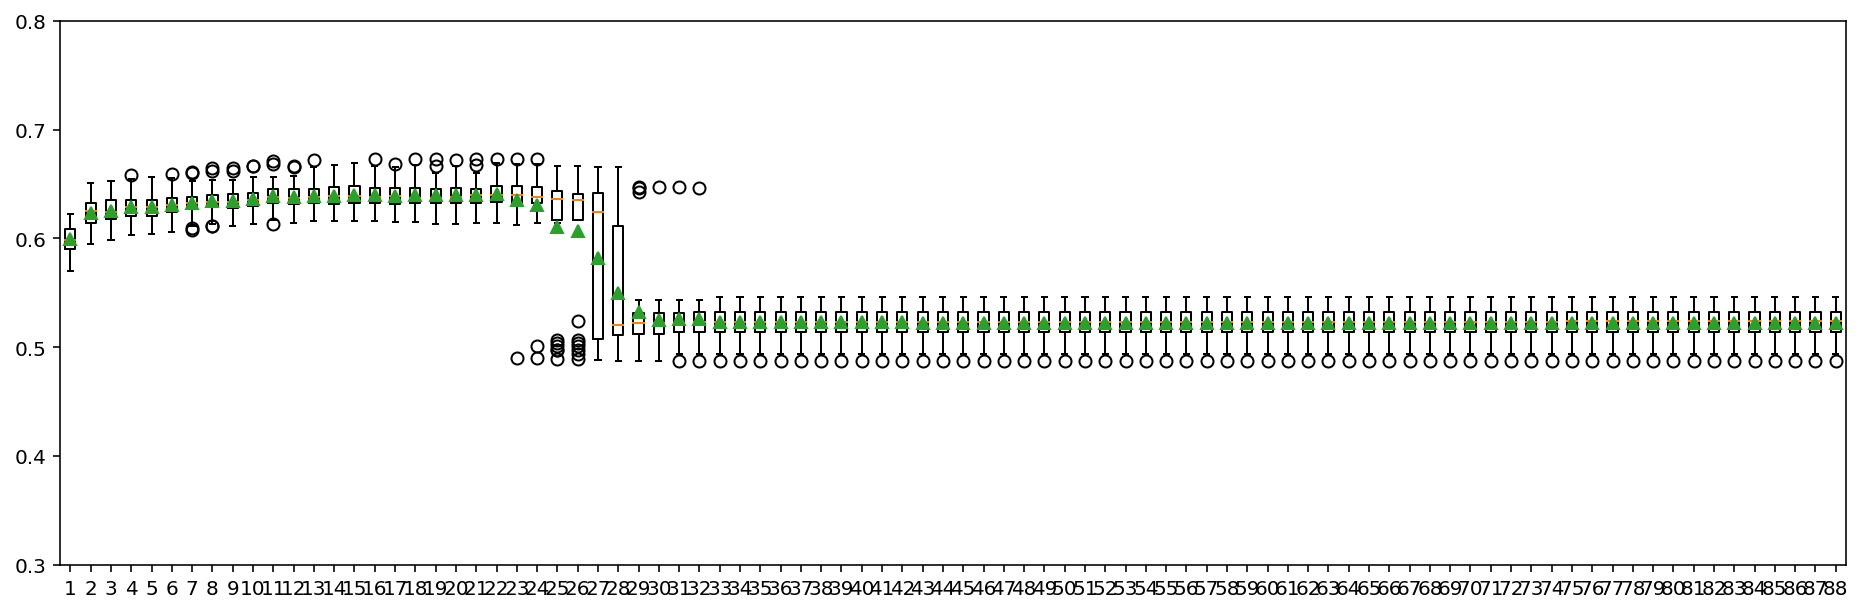

In [72]:
plt.figure(figsize=(16,5))
pyplot.boxplot(results, labels=num_features, showmeans=True)
plt.ylim(.3,.8)
plt.savefig("../Figures/plot_01_2_SelectKBest_boxplot.png")


pyplot.show()

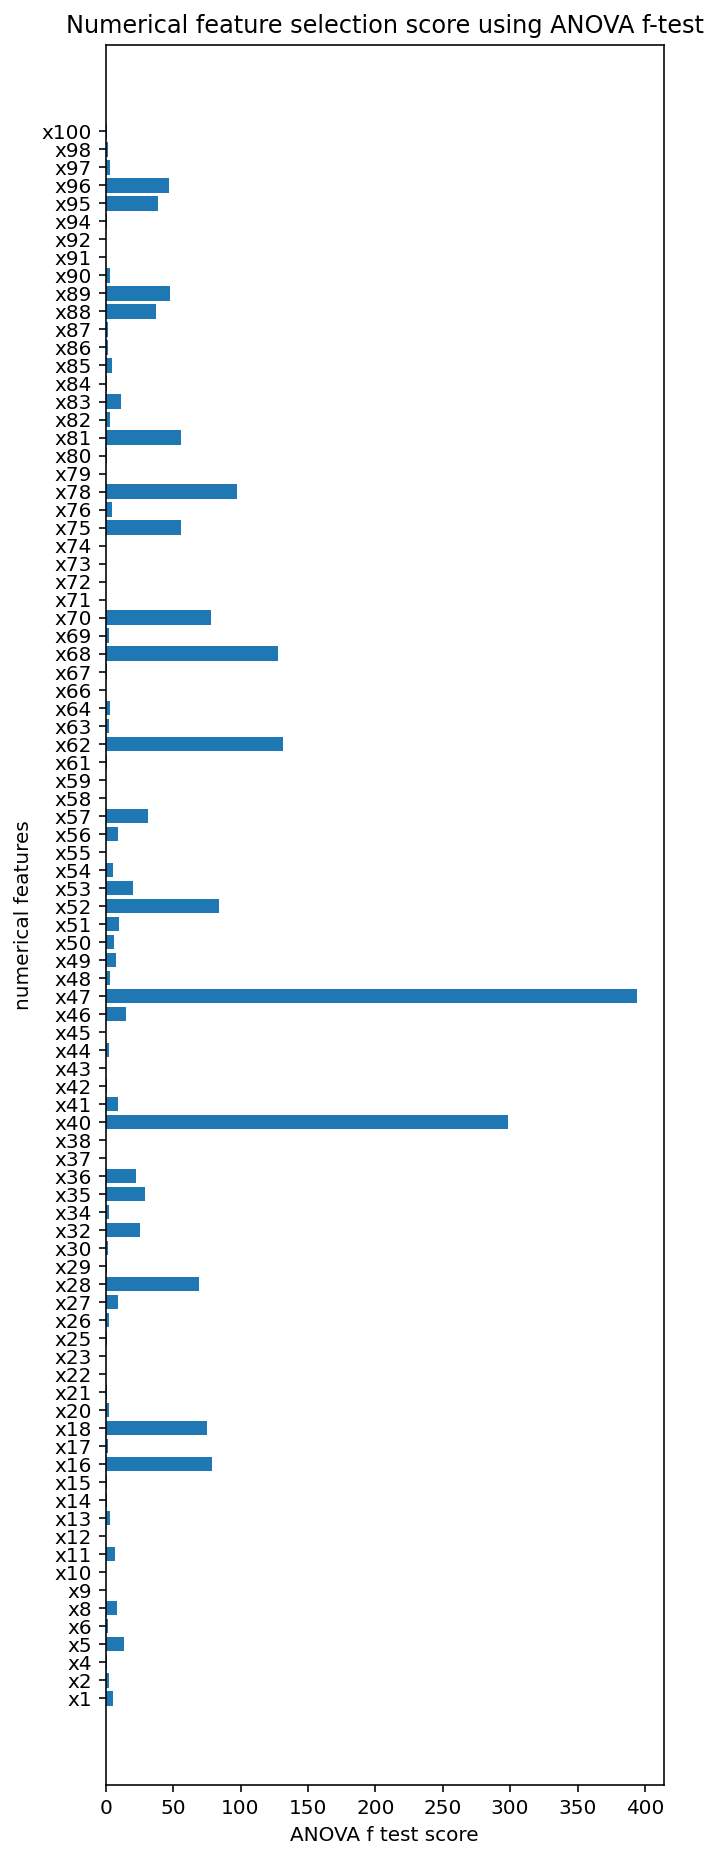

In [73]:
# example of anova f-test feature selection for numerical data

 
# load the dataset
def load_dataset():
    # load the dataset as a pandas DataFrame
    # 	data = read_csv(filename, header=None)
    # retrieve numpy array
    # 	dataset = data.values
    # split into input (X) and output (y) variables
    # 	X = dataset[:, :-1]
    # 	y = dataset[:,-1]

    X = df_numeric_features
    X = X.values
    y = df['y']
    y= y.values

    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    
    #impute NaNs using simpleImputer
    imp = SimpleImputer(strategy='mean')
    imp.fit(X_train, y_train)
    X_train_imp = imp.transform(X_train)
    X_test_imp = imp.transform(X_test)
    
    #min max scaler
    scl = MinMaxScaler(feature_range=(0.001, 1))
    scl.fit(X_train_imp, y_train)
    X_train_imp_scl = scl.transform(X_train_imp)
    X_test_imp_scl = scl.transform(X_test_imp)
    
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train_imp_scl, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train_imp_scl)
    # transform test input data
    X_test_fs = fs.transform(X_test_imp_scl)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
    
plt.figure(figsize=(5,16))

labs = np.array(df_numeric_features.columns)
# plot the scores
plt.barh(labs,fs.scores_)

plt.title('Numerical feature selection score using ANOVA f-test')
plt.xlabel('ANOVA f test score')
plt.ylabel('numerical features')
plt.savefig("../Figures/plot_01_2_featureselect_anova.png")

pyplot.show()

In [74]:
fs.scores_.tolist()
labs = df_numeric_features.columns


high_score_features = []
for i, elem in enumerate(fs.scores_.tolist()):
    
    if elem > np.mean(fs.scores_):
        high_score_features.append(labs[i])

In [75]:
print('high_score_features are\n', high_score_features)
print(len(high_score_features))

high_score_features are
 ['x16', 'x18', 'x28', 'x32', 'x35', 'x40', 'x47', 'x52', 'x57', 'x62', 'x68', 'x70', 'x75', 'x78', 'x81', 'x88', 'x89', 'x95', 'x96']
19


# High score numerical features are as follow

['x16', 'x18', 'x28', 'x32', 'x35', 'x40', 'x47', 'x52', 'x57', 'x62', 'x68', 'x70', 'x75', 'x78', 'x81', 'x88', 'x89', 'x95', 'x96']

In [76]:
np.mean(fs.scores_)

23.069145220925602

In [77]:
np.std(fs.scores_)

57.33037663081586

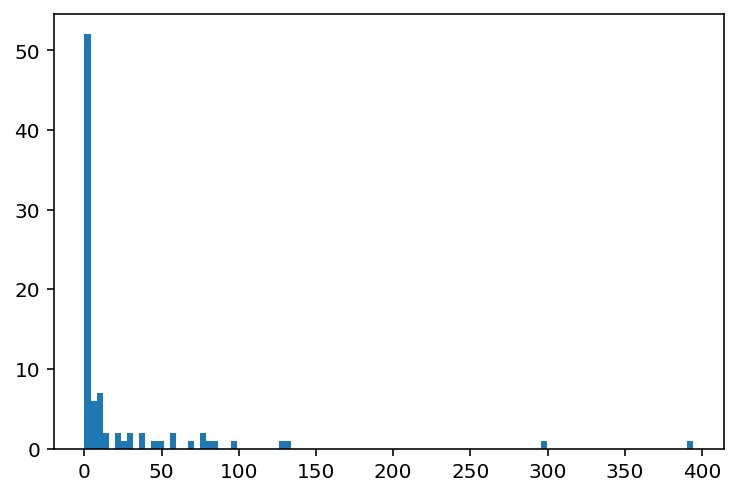

In [78]:
plt.hist(fs.scores_, bins=100)
plt.savefig("../Figures/plot_01_2_High_score_numerical_features.png")

plt.show()

# Feature extraction 

using Principle Component Analysis (PCA) 

In [79]:
# compare pca number of components with logistic regression algorithm for classification    
# load the dataset
def get_dataset():
    # load the dataset as a pandas DataFrame
    # 	data = read_csv(filename, header=None)
    # retrieve numpy array
    # 	dataset = data.values
    # split into input (X) and output (y) variables
    # 	X = dataset[:, :-1]
    # 	y = dataset[:,-1]

    X = df_numeric_features
    X = X.values
    y = df['y']
    y= y.values

    return X, y

# get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# 	return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,15):
        steps = [('imputer', SimpleImputer(strategy='mean')),
                 ('norm',MinMaxScaler(feature_range=(0.001, 1))),
                 ('pca', PCA(n_components=i)), 
                 ('m', LogisticRegression(class_weight=weights))]
        
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', 
                             cv=cv, n_jobs=-1, error_score='raise')

    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.537 (0.013)
>2 0.571 (0.013)
>3 0.596 (0.013)
>4 0.596 (0.013)
>5 0.595 (0.013)
>6 0.595 (0.013)
>7 0.596 (0.013)
>8 0.596 (0.013)
>9 0.596 (0.013)
>10 0.599 (0.012)
>11 0.601 (0.012)
>12 0.618 (0.012)
>13 0.618 (0.012)
>14 0.618 (0.012)


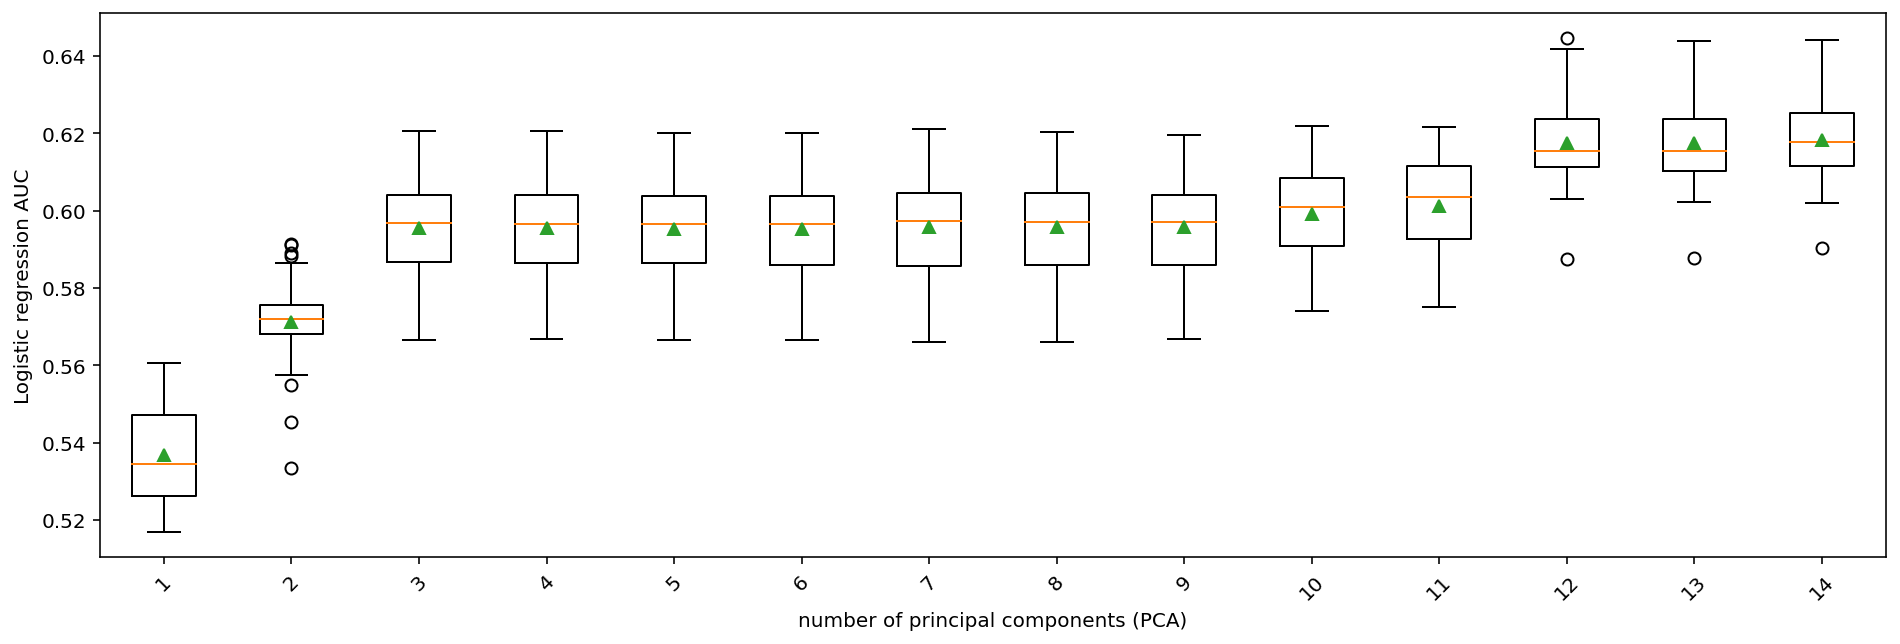

In [80]:
plt.figure(figsize=(16,5))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
plt.ylabel('Logistic regression AUC')
plt.xlabel('number of principal components (PCA)')

plt.savefig("../Figures/plot_01_2_lr_auc_cv_14_feature.png")

pyplot.show()

# With n_components=12, I get 0.62 AUC and as it is seen 12 principal components have 62٪ of variance. I may apply PCA if I found not using it computationally time expensive.

In [81]:
X = df_numeric_features
X = X.values
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)

norm = MinMaxScaler(feature_range=(0.001, 1))
X_imp_norm = norm.fit_transform(X_imp)

pca = PCA(n_components=12)
X_imp_norm_pca = pca.fit_transform(X_imp_norm)

sum(pca.explained_variance_ratio_)

0.6205966172441199

it is seen 12 principal components have 62٪ of variance.

In [82]:
# https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

In [83]:
# load the dataset
X, y = load_dataset()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Some experiments using pipeline


Logistic Regression

In [84]:
# df_numeric['y'].value_counts(normalize=True)

In [85]:
# weights

In [86]:
pipe = Pipeline([
('imputer', SimpleImputer()),
('scaler', StandardScaler()),
('pt',PowerTransformer()),
('selector', VarianceThreshold()),
('classifier', LogisticRegression(class_weight=weights)),
])

In [87]:
# pipe.fit(X_train, y_train)

# print('Training set score: ' + str(pipe.score(X_train,y_train)))
# print('Test set score: ' + str(pipe.score(X_test,y_test)))

In [88]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X, y, scoring='roc_auc', 
                         cv=cv, n_jobs=-1, error_score='raise')
scores.mean()

0.6464593448121577

# Recap for Numerical features


- Column 'x30', 'x44', 'x57' have more than 50% nan and should be droped
- Three features inside the numeric df need to be transformed using One Hot Encoding. These are features with 0-1 values and should be treated like category features. These are 0-1 features and should be treated like category features. columns are x59 and x79 and x98
- I may use Isolation Forest or LOF for outlier detection. I will check the AUC to see the differences.
- High score numerical features are as follow:
```['x16', 'x18', 'x28', 'x32', 'x35', 'x40', 'x47', 'x52', 'x57', 'x62', 'x68', 'x70', 'x75', 'x78', 'x81', 'x88', 'x89', 'x95', 'x96']```
- With n_components=12, I get 0.62 AUC and as it is seen 12 principal components have 62٪ of variance. I may apply PCA if I found not using it computationally time expensive.

In [89]:
df_numeric['x59'].values

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
# ohe = OneHotEncoder()
# ohe.fit_transform(df_numeric['x59'])

In [91]:
enc = OneHotEncoder(handle_unknown='ignore')
X = df_numeric['x59'].values
X = X.reshape(-1, 1) 
enc.fit_transform(X).toarray()

# enc.categories_

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [92]:
df_numeric_features.columns

Index(['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25',
       'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')

In [93]:
X_all_features = df.drop(columns=['y'],axis=1)
X_all_features.columns


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100'],
      dtype='object')

In [94]:
df_numeric_features.columns

Index(['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25',
       'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
       'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')

In [95]:
X_catg.nunique()

NameError: name 'X_catg' is not defined

In [ ]:
X_catg = df[['x3', 'x24', 'x31', 'x33', 'x60', 'x65', 'x77', 'x93']]

# y = df['y']

# X_catg_trans_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

X_catg_trans_pipe = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('scaler', OneHotEncoder())])


X_numeric_trans_pipe = Pipeline([
('imputer', SimpleImputer()),
('scaler', StandardScaler()),
('pt',PowerTransformer()),
('selector', VarianceThreshold()),
('pca',PCA(n_components=30)),
# ('classifier', LogisticRegression(class_weight=weights)),
])

col_transform_catg = make_column_transformer((X_catg_trans_pipe, 
                                              ['x3', 'x24', 'x31','x33', 
                                               'x60', 'x65','x77', 'x93']),
                                            remainder='passthrough')

col_transform_numr = make_column_transformer((X_numeric_trans_pipe, 
                                              ['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
                                               'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25',
                                               'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37',
                                               'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48',
                                               'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
                                               'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70',
                                               'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81',
                                               'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
                                               'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']),
                                            remainder='passthrough')

weights = {0:0.85, 1:0.14}
logreg = LogisticRegression(solver='sag', class_weight=weights)

Final_pipe = make_pipeline(col_transform_catg, col_transform_numr, logreg)
cross_val_score(Final_pipe, X_all_features, y, cv=5, scoring='roc_auc')

In [ ]:
numeric_pipe = make_pipeline(col_transform_numr, logreg)
cross_val_score(numeric_pipe, df_numeric_features, y, cv=5, 
                scoring='roc_auc', n_jobs=-1,verbose=True).mean()

In [ ]:
catg_pipe = make_pipeline(col_transform_catg, logreg)
cross_val_score(catg_pipe, X_catg, y, cv=5, 
                scoring='roc_auc', n_jobs=-1,verbose=True).mean()

In [ ]:
# col_transform_catg.fit_transform(X_catg).toarray()